In [1]:
#Importing Libraries


from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.api.types import is_string_dtype,is_numeric_dtype
from keras.callbacks import ModelCheckpoint

%matplotlib inline

import os

os.chdir("C:/Users/shrey/Desktop/MLAsg3")

Using TensorFlow backend.


In [2]:
%pwd

'C:\\Users\\shrey\\Desktop\\MLAsg3'

In [3]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 4EB0-3F77

 Directory of C:\Users\shrey\Desktop\MLAsg3

08/07/2019  12:51 AM    <DIR>          .
08/07/2019  12:51 AM    <DIR>          ..
08/06/2019  12:57 AM    <DIR>          .ipynb_checkpoints
08/07/2019  12:51 AM           367,239 blackFriday.ipynb
08/02/2019  11:20 AM            23,873 diabetes.csv
08/05/2019  07:02 PM            24,049 pima-indians-diabetes.data
08/06/2019  01:05 AM           241,808 pimaindiansdiabetesClassification.ipynb
08/05/2019  06:26 PM         9,598,228 test.csv
08/05/2019  06:26 PM        25,525,678 train.csv
               6 File(s)     35,780,875 bytes
               3 Dir(s)  83,277,787,136 bytes free


In [4]:
my_path = 'C:\\Users\\shrey\\Desktop\\MLAsg3'

In [5]:
df_train = pd.read_csv(f'{my_path}\\train.csv')
df_test = pd.read_csv(f'{my_path}\\test.csv')
print(df_train.shape, df_test.shape)


(550068, 12) (233599, 11)


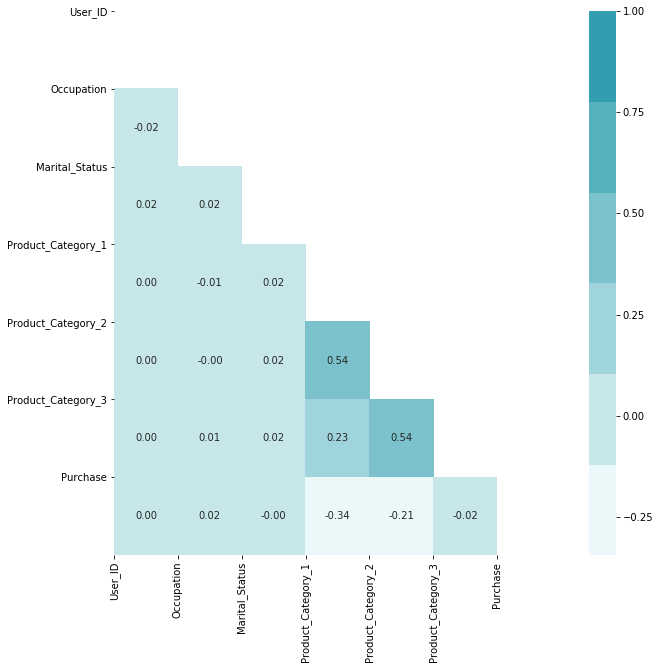

In [6]:
# correlation in consol scrren
#data.corr()

# correlation visualization square
#f,ax = plt.subplots(figsize=(10,5))
#sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
#plt.show()

# correlation visualization triangle
corr = df_train.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
# Generate Color Map
colormap = sns.light_palette((210, 90, 60), input="husl")
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

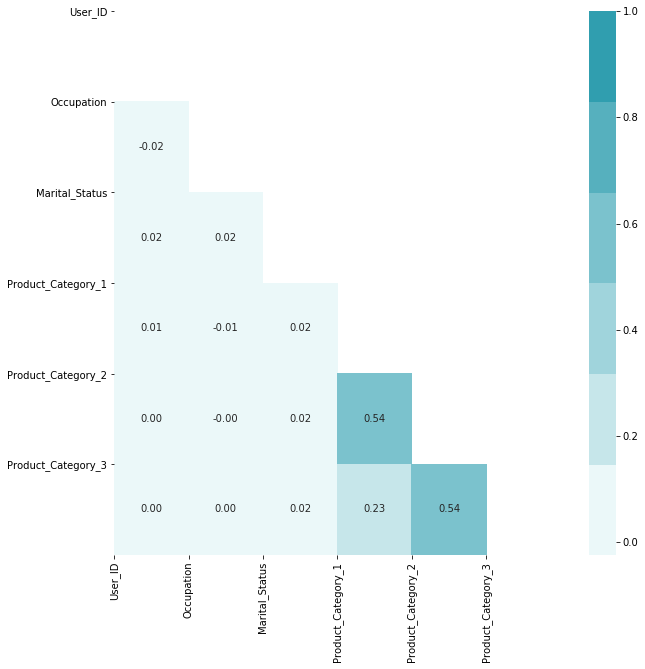

In [7]:
# correlation in consol scrren
#data.corr()

# correlation visualization square
#f,ax = plt.subplots(figsize=(10,5))
#sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
#plt.show()

# correlation visualization triangle
corr = df_test.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
# Generate Color Map
colormap = sns.light_palette((210, 90, 60), input="husl")
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [8]:

corr = df_train.corr()
corr




,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


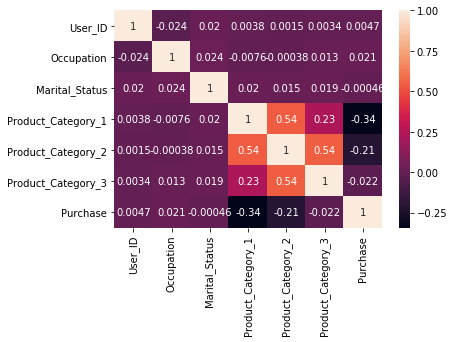

In [9]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

In [10]:

corr = df_test.corr()
corr




,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,1.000000,-0.023988,0.019883,0.006428,0.004065,0.000316
Occupation,-0.023988,1.000000,0.021872,-0.010465,-0.001685,0.003838
Marital_Status,0.019883,0.021872,1.000000,0.018860,0.021766,0.016119
Product_Category_1,0.006428,-0.010465,0.018860,1.000000,0.540063,0.225054
Product_Category_2,0.004065,-0.001685,0.021766,0.540063,1.000000,0.543417
Product_Category_3,0.000316,0.003838,0.016119,0.225054,0.543417,1.000000


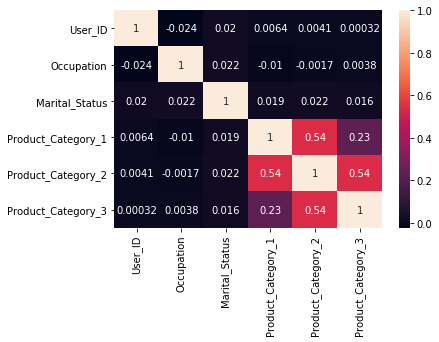

In [11]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

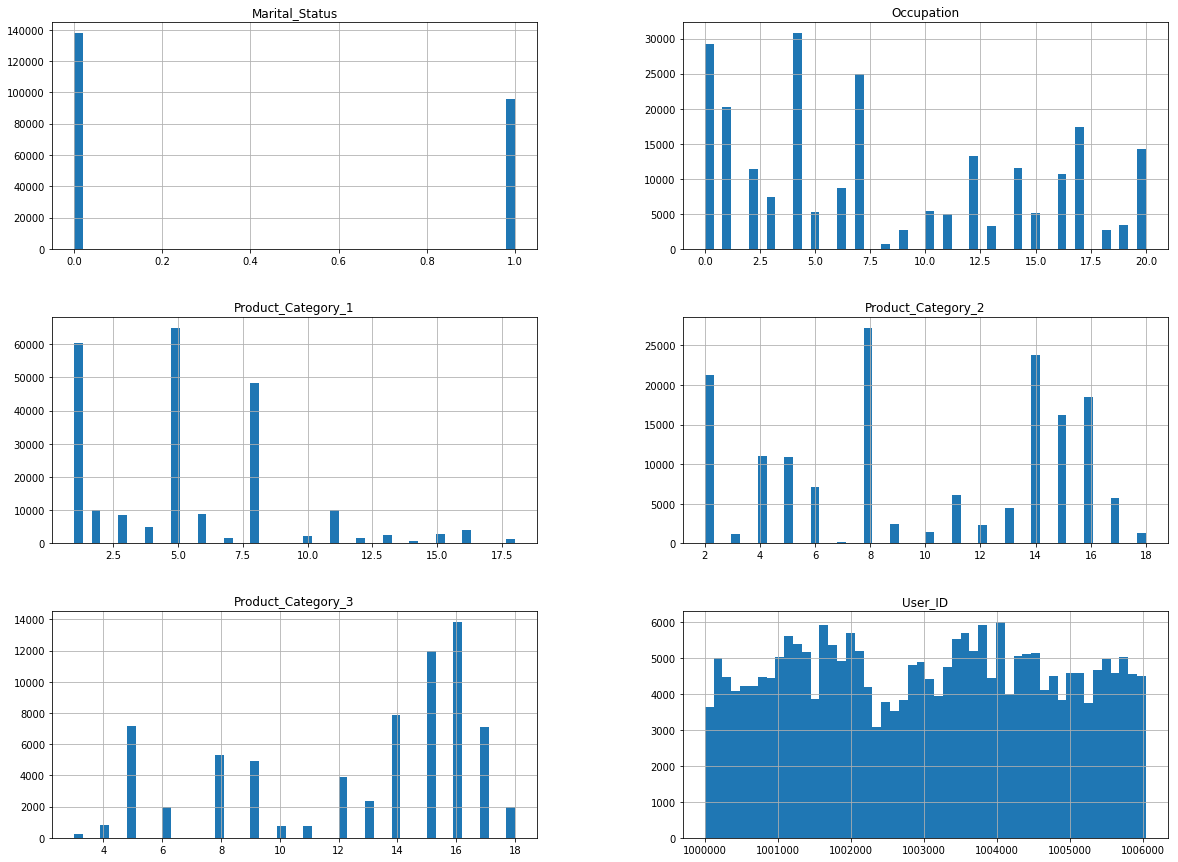

In [12]:
import matplotlib.pyplot as plt
df_test.hist(bins=50, figsize=(20, 15))
plt.show()


# Pre-process data, train-Valid split

In [13]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [14]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [15]:

total_miss = df_train.isnull().sum()
perc_miss = total_miss/df_train.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,
                            '% missing':perc_miss})

missing_data.sort_values(by='Total missing',
                         ascending=False).head(3)

,Total missing,% missing
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643
User_ID,0,0.000000


In [16]:
print('Unique Values for Each Feature: \n')
for i in df_train.columns:
    print(i, ':',df_train[i].nunique())

Unique Values for Each Feature: 

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 20
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 18105


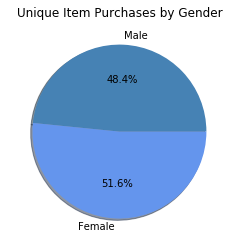

In [17]:
plt.pie(df_train.groupby('Gender')['Product_ID'].nunique(),labels=['Male','Female'],
       shadow=True, autopct='%1.1f%%',colors=['steelblue','cornflowerblue'])
plt.title('Unique Item Purchases by Gender')
plt.show()

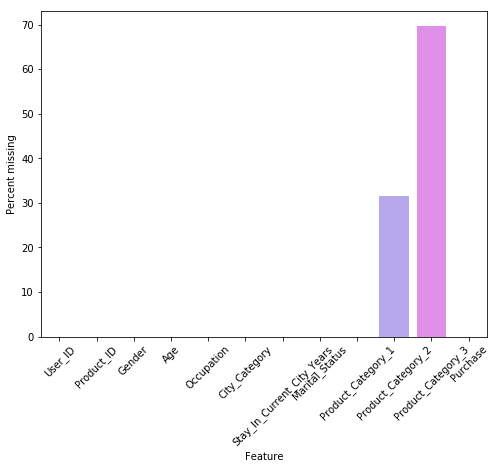

In [18]:
''' Deal with missing values. First, calculate the percentage of
missing values for every column, and plot them as a bar chart'''

null_vals = df_train.isnull().sum()/len(df_train)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

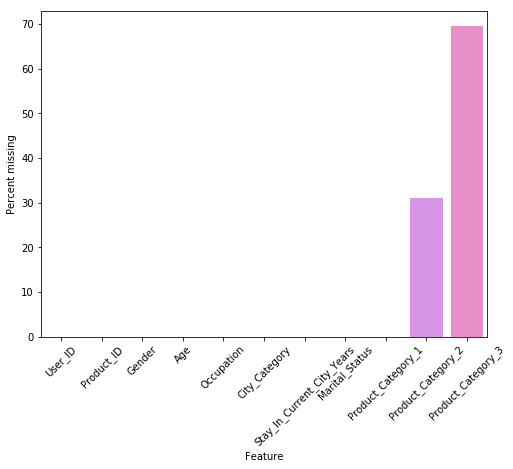

In [19]:
''' Deal with missing values. First, calculate the percentage of
missing values for every column, and plot them as a bar chart'''

null_vals = df_test.isnull().sum()/len( df_test)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

# Pre-process of train and test.csv dataset , train-Valid split

In [20]:
'''You can see that several of the columns or features are "object" type
These need to be changed to category before we can convert those to 
mappings and numbers'''
#1 (a) Define a function to convert object types and string types to category type

def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [22]:
df_train_new = str_to_cat(df_train)

In [23]:
df_test_new = str_to_cat(df_test)

In [24]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null category
Gender                        550068 non-null category
Age                           550068 non-null category
Occupation                    550068 non-null int64
City_Category                 550068 non-null category
Stay_In_Current_City_Years    550068 non-null category
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: category(5), float64(2), int64(5)
memory usage: 32.7 MB


In [25]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null category
Gender                        233599 non-null category
Age                           233599 non-null category
Occupation                    233599 non-null int64
City_Category                 233599 non-null category
Stay_In_Current_City_Years    233599 non-null category
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: category(5), float64(2), int64(4)
memory usage: 12.2 MB


In [26]:

def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [27]:
df_3,my_table = mydf_preprocessor(df_train,null_table = None)

In [28]:
df_3_test,my_table = mydf_preprocessor(df_test,null_table = None)

In [29]:


from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(df_3.iloc[:, 9:11].values)
df_3.iloc[:,9:11] = imputer.transform(df_3.iloc[:, 9:11].values)
df_3.info() 


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null int16
Gender                        550068 non-null int8
Age                           550068 non-null int8
Occupation                    550068 non-null int64
City_Category                 550068 non-null int8
Stay_In_Current_City_Years    550068 non-null int8
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
Product_Category_2_na         550068 non-null bool
Product_Category_3_na         550068 non-null bool
dtypes: bool(2), float64(2), int16(1), int64(5), int8(4)
memory usage: 33.6 MB


In [30]:

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(df_3_test.iloc[:, 9:11].values)
df_3_test.iloc[:,9:11] = imputer.transform(df_3_test.iloc[:, 9:11].values)
df_3_test.info() 

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 13 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null int16
Gender                        233599 non-null int8
Age                           233599 non-null int8
Occupation                    233599 non-null int64
City_Category                 233599 non-null int8
Stay_In_Current_City_Years    233599 non-null int8
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            233599 non-null float64
Product_Category_3            233599 non-null float64
Product_Category_2_na         233599 non-null bool
Product_Category_3_na         233599 non-null bool
dtypes: bool(2), float64(2), int16(1), int64(4), int8(4)
memory usage: 12.5 MB


In [31]:
df_3_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 13 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null int16
Gender                        233599 non-null int8
Age                           233599 non-null int8
Occupation                    233599 non-null int64
City_Category                 233599 non-null int8
Stay_In_Current_City_Years    233599 non-null int8
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            233599 non-null float64
Product_Category_3            233599 non-null float64
Product_Category_2_na         233599 non-null bool
Product_Category_3_na         233599 non-null bool
dtypes: bool(2), float64(2), int16(1), int64(4), int8(4)
memory usage: 12.5 MB


In [32]:
df_3_test["Gender"].head()


0    2
1    2
2    1
3    1
4    1
Name: Gender, dtype: int8

# Feature Scaling of train and test.csv datasets

In [33]:
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(df_3)
df_scaled_train = scaler.transform(df_3)

In [34]:
from sklearn.preprocessing import MinMaxScaler as Scaler

scaler = Scaler()
scaler.fit(df_3_test)
df_scaled_test = scaler.transform(df_3_test)

In [35]:
df_new_train= pd.DataFrame(data=df_scaled_train)
df_new_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.185124,0.0,0.0,0.5,0.0,0.5,0.0,0.105263,0.4375,0.733333,0.348992,1.0,1.0
1,0.000000,0.654545,0.0,0.0,0.5,0.0,0.5,0.0,0.000000,0.2500,0.733333,0.634181,0.0,0.0
2,0.000000,0.234711,0.0,0.0,0.5,0.0,0.5,0.0,0.578947,0.4375,0.733333,0.058875,1.0,1.0
3,0.000000,0.228099,0.0,0.0,0.5,0.0,0.5,0.0,0.578947,0.7500,0.733333,0.043634,0.0,1.0
4,0.000166,0.753168,1.0,1.0,0.8,1.0,1.0,0.0,0.368421,0.4375,0.733333,0.332248,1.0,1.0


In [36]:
df_new_test= pd.DataFrame(data=df_scaled_test)
df_new_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000497,0.327794,1.0,0.666667,0.35,0.5,0.50,1.0,0.000000,0.5625,0.733333,0.0,1.0
1,0.001325,0.284814,1.0,0.333333,0.85,1.0,0.00,0.0,0.117647,0.1875,0.733333,0.0,1.0
2,0.001490,0.765616,0.0,0.500000,0.05,0.5,1.00,1.0,0.235294,0.7500,0.733333,0.0,1.0
3,0.001490,0.372206,0.0,0.500000,0.05,0.5,1.00,1.0,0.176471,0.4375,0.733333,0.0,1.0
4,0.001656,0.148711,0.0,0.333333,0.05,1.0,0.25,0.0,0.176471,0.1875,0.600000,0.0,0.0


In [37]:
#Separate out X and Y

X = df_new_train.iloc[:, :9]
Y = df_new_train.iloc[:, 9:10]
X_test=df_new_test.iloc[:, :9]
Y_test=df_new_test.iloc[:, 9:10]

In [38]:
# Train- valid Split
(X_train, X_valid, Y_train, Y_valid) = train_test_split(X, Y, test_size=0.33, random_state=1)
print(X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape)

(368545, 9) (181523, 9) (368545, 1) (181523, 1)


In [39]:
X_test


,0,1,2,3,4,5,6,7,8
0,0.000497,0.327794,1.0,0.666667,0.35,0.5,0.50,1.0,0.000000
1,0.001325,0.284814,1.0,0.333333,0.85,1.0,0.00,0.0,0.117647
2,0.001490,0.765616,0.0,0.500000,0.05,0.5,1.00,1.0,0.235294
3,0.001490,0.372206,0.0,0.500000,0.05,0.5,1.00,1.0,0.176471
4,0.001656,0.148711,0.0,0.333333,0.05,1.0,0.25,0.0,0.176471
5,0.001987,0.928367,1.0,0.666667,0.05,1.0,0.75,1.0,0.058824
6,0.001987,0.400860,1.0,0.666667,0.05,1.0,0.75,1.0,0.000000
7,0.001987,0.984814,1.0,0.666667,0.05,1.0,0.75,1.0,0.058824
8,0.002318,0.417765,1.0,0.333333,0.35,0.0,0.25,0.0,0.529412
9,0.003477,0.182808,1.0,0.166667,0.75,0.0,1.00,0.0,0.235294


# Build and compile a deep learning model

In [47]:
model = Sequential()
model.add(Dense(100, init='uniform',input_dim = 9, activation='relu'))
# The Hidden Layers :
model.add(Dense(30, init='uniform',activation='relu'))
model.add(Dense(20, init='uniform',activation='relu'))
model.add(Dense(10, init='uniform',activation='relu'))
model.add(Dense(1, init='uniform',activation='linear'))#regression problem and to have O/p between -inf to +inf (all real Numbers)


C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=9, activation="relu", kernel_initializer="uniform")`
  
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  """
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="uniform")

In [41]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

W0807 00:52:11.818734  1580 deprecation_wrapper.py:119] From C:\Users\shrey\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 4,871
Trainable params: 4,871
Non-trainable params: 0
_________________________________________________________________


In [42]:
history=model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=3, batch_size=10, verbose= 2)

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0807 00:52:12.018200  1580 deprecation_wrapper.py:119] From C:\Users\shrey\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0807 00:52:12.137880  1580 deprecation_wrapper.py:119] From C:\Users\shrey\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 368545 samples, validate on 181523 samples
Epoch 1/3
 - 41s - loss: 0.1805 - acc: 0.0896 - val_loss: 0.1720 - val_acc: 0.0895
Epoch 2/3
 - 43s - loss: 0.1699 - acc: 0.0896 - val_loss: 0.1683 - val_acc: 0.0895
Epoch 3/3
 - 37s - loss: 0.1690 - acc: 0.0896 - val_loss: 0.1680 - val_acc: 0.0895


In [43]:
# Evaluate the model
scores = model.evaluate(X_valid, Y_valid,  batch_size=5, verbose=1)
print ("Accuracy: %.2f%%" %(scores[1]*100))

181523/181523 [==============================] - 11s 60us/step
Accuracy: 8.95%


In [44]:
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

233599/233599 [==============================] - 3s 12us/step
Accuracy: 9.12%


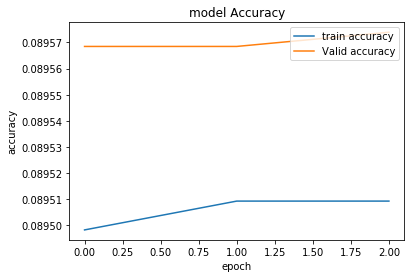

In [46]:
plt.figure()

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])


plt.title('model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['train accuracy', 'Valid accuracy'], loc='upper right')
plt.show()
